In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Task 1: Load and pre-process the data set.

Step 1: Delete manually the redundant ";" in line 3149 and line 4821 to run the code.

Step 2: Delete manually 6 full "NaN" elements lines - line 312, 1437, 1444, 1523, 2283, 4821 because these lines do not provide any information

Step 3: Change the invalid value in 'quality' attribute to NaN

Step 4: Delete by code all rows that have missing value.

Read the data from file and show the information and description:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

wine_data = pd.read_csv('winedata.csv',sep = ';', na_values = ['high','low', ' '])
wine_data.info()
wine_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 12 columns):
fixed acidity           4892 non-null float64
volatile acidity        4891 non-null float64
citric acid             4842 non-null float64
residual sugar          4886 non-null float64
chlorides               4890 non-null float64
free sulfur dioxide     4888 non-null float64
total sulfur dioxide    4889 non-null float64
density                 4890 non-null float64
pH                      4890 non-null float64
sulphates               4892 non-null float64
alcohol                 4890 non-null float64
quality                 4795 non-null float64
dtypes: float64(12)
memory usage: 458.8 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4892.000000,4891.000000,4842.000000,4886.000000,4890.000000,4888.000000,4889.000000,4890.000000,4890.000000,4892.000000,4890.000000,4795.000000
mean,6.855100,0.278253,0.334292,6.396081,0.045778,35.331015,138.409388,0.994029,3.188119,0.489808,10.514188,5.876955
std,0.843951,0.100819,0.120942,5.074092,0.021861,17.013638,42.503065,0.002992,0.150934,0.114085,1.230431,0.884602
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993745,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [40]:
a = df.isnull().sum()
b = list(df.columns)
c = []
for i in range (0,10):
    if a[i] != 0:
        c.append((b[i], a[i]))
MissingData = pd.DataFrame(c, columns =['Columns', 'Number'])
print (MissingData)

[('volatile acidity', 1), ('citric acid', 50), ('residual sugar', 6), ('chlorides', 2), ('free sulfur dioxide', 4), ('total sulfur dioxide', 3), ('density', 2), ('pH', 2)]
                Columns  Number
0      volatile acidity       1
1           citric acid      50
2        residual sugar       6
3             chlorides       2
4   free sulfur dioxide       4
5  total sulfur dioxide       3
6               density       2
7                    pH       2


Check the number of duplicate line:

In [5]:
duplicate = wine_data[wine_data.duplicated()]
print(duplicate.shape)

(880, 12)


Delete all rows with missing value:

In [6]:
wine_data = wine_data.dropna()

Conclusion:

1. There are 4892 wines (collected from Range Index)

2. There are 880 duplicate lines => All the wines are not unique. The number of unique wines is: 4892 - 880 = 4012 unique wines.

3. From the information of data, all attributes except 'fixed acidity' and  'sulphates' have missing data. The 'quality' attribute also have invalid data: 'low' and 'high'.

4. From the description of the attributes, the minimum value , the maximum value and the mean value of each attribute is different with others. For example, for 'citric acid' min is 0.000, max is 1.660 and mean is 0.334 ; for 'total sulfur dioxide' min is 9.000, max is 440.000 and mean is 138.409 => the scale of the different attributes is not approximately equal.

# Task 2: Visualise the data

Step 1: Plot frequency histograms of each attribute in the data set.

Step 2: Calculate the correlation of each other attribute with 'quality' and find 3 attributes that are most correlated with 'quality'.

Step 3: For these 3 attributes, display scatter plots of each attribute against 'quality'.

Plot the histograms of each attribute in the data set:

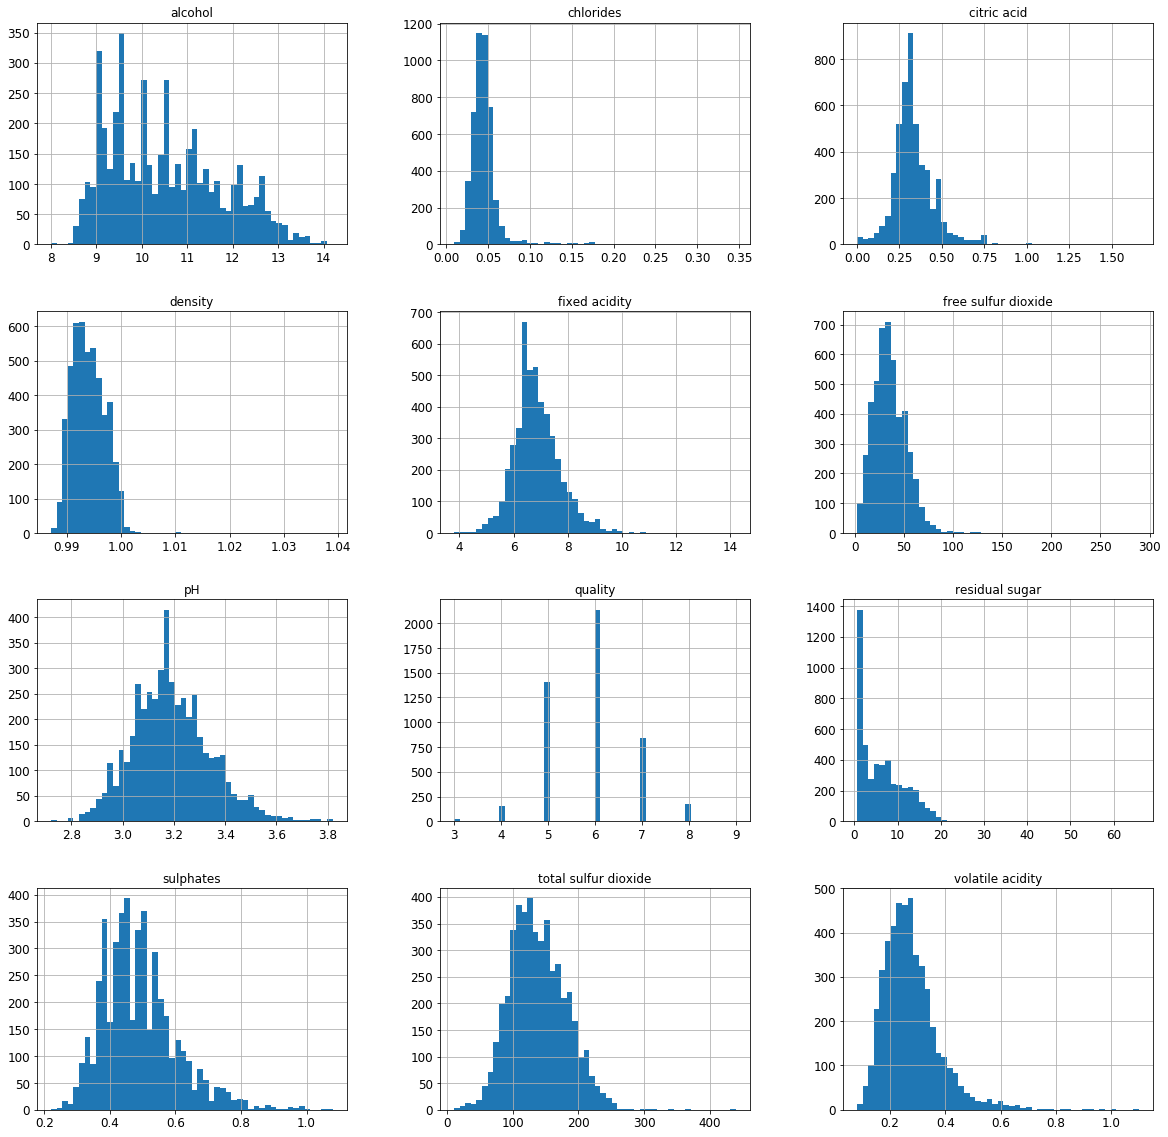

In [55]:
wine_data.hist(bins = 50 , figsize = (20,20))
plt.show()

1. From these histograms, I can observe the range and how frequent the most frequent distribution of each attribute. For example: 'Alcohol' value has the range of the most frequent distribution is 9 to 10 and the most frequent value appears around 350 times. 'Total sulfur dioxide' value has the range of the most frequent distribution is 100 to 130 and the most frequent value appears around 400 times.

Calculate the correlation:

In [8]:
correlation = wine_data.corr()
correlation['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.432733
pH                      0.096504
sulphates               0.054807
free sulfur dioxide     0.007281
citric acid            -0.007378
residual sugar         -0.097953
fixed acidity          -0.115778
total sulfur dioxide   -0.177521
volatile acidity       -0.201044
chlorides              -0.207202
density                -0.305599
Name: quality, dtype: float64

2a. From the calculate, 'alcohol', 'chlorides' and 'density' are 3 attributes that have greatest absolute values => they are 3 attributes that are most correlated with 'quality'.

Draw the scatter plots of these 3 attributes:

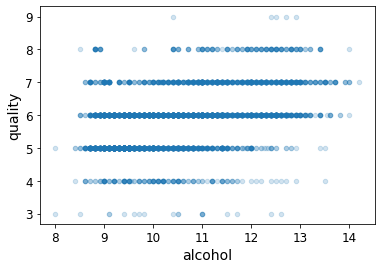

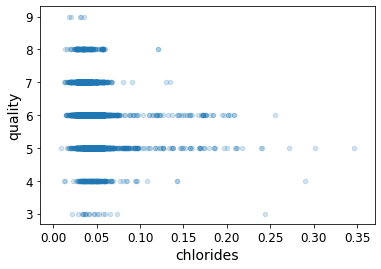

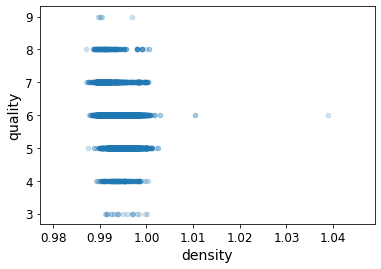

In [56]:
wine_data.plot(kind = 'scatter', x = 'alcohol', y = 'quality', alpha = 0.2)
wine_data.plot(kind = 'scatter', x = 'chlorides', y = 'quality', alpha = 0.2)
wine_data.plot(kind = 'scatter', x = 'density', y = 'quality', alpha = 0.2)

2b. From these scatter plots, we can observe that:

If 'Alcohol' value is belong [8, 8.5] then 'Quality' value is belong to [3,5]. If 'Alcohol' value is belong [8, 14.2] then 'Quality' value is belong to [3,9]. 

If 'Chlorides' value is belong [0.009, 0.145] then 'Quality' value is belong to [3,9]. If 'Chlorides' value is belong [0.145, 0.346] then 'Quality' value is belong to [3,6]. 

If 'Density' value is belong [0.987110, 1.004000] then 'Quality' value is belong to [3,9]. If 'Density' value is belong [1.004000, 1.038980] then 'Quality' value is 6. 

=> Conclusion: If 'Alcohol' value is belong to [8, 14.2]; 'Chlorides' value is belong to [0.009, 0.145]; 'Density' value is belong to [0.987110, 1.004000] then 'Quality' value is belong to [3,9]

# Task 3: Predicting wine quality: baseline 

Step 1:  Split 80% of the data set into training data, other 20% of the data set into test data

Step 2:  Use the median quality value in the training set as predicted value 

Step 3: Calculate the rmse for this predictor when used on the training data

Split the data set

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine_data, test_size = 0.2, random_state = 89)

In [11]:
training_features = train_set.drop(['quality'], axis=1)
training_labels = train_set['quality'].copy()

Use the median quality value as predicted value and calculate the root mean square error (rmse) of this predictor:

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
training_labels_predict1 = [train_set['quality'].median()] * training_labels.size
np.sqrt(mean_squared_error(training_labels, training_labels_predict1))

0.8922995694537275

Conclusion:

1. The rmse for the predictor that use the median quality value as predicted value on the training set is 0.892

2. From definition, classification is used to predicts discrete classes and regression is used to predict continuous values. Hence, to use classification, we need to divide the output into different discrete classes. However, in this data, we want to predict the value of 'quality' in the range from 1 to 10 => Regression is better when using for this data.

# Task 4: Predicting wine quality

The scatter plot represents the combination of actual quality, predicted quality (with x is predicted quality and y is actual quality).

Build a linear regression model and calculate the rmse on training data:

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(training_features,training_labels)
training_labels_predict2 = reg.predict(training_features)
np.sqrt(mean_squared_error(training_labels, training_labels_predict2))

0.748918955558996

=> The rmse of linear regression model is 0.749

Draw a scatter plot represents the combination of actual quality, predicted quality of the linear regression model:

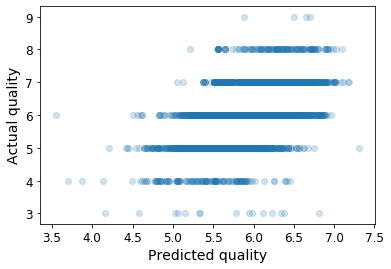

In [57]:
plt.scatter(x = training_labels_predict2, y = training_labels, alpha = 0.2)
plt.xlabel('Predicted quality')
plt.ylabel('Actual quality')
plt.show()

=> From the plot, we can observe that this model has low variance.

Build a k nearest neighbour regression model with k = 2 and calculate the rmse on training data:

In [15]:
from sklearn.neighbors import KNeighborsRegressor
neigh1 = KNeighborsRegressor(n_neighbors = 2)
neigh1.fit(training_features,training_labels)
training_labels_predict3 = neigh1.predict(training_features)
np.sqrt(mean_squared_error(training_labels, training_labels_predict3))

0.4477740322409436

=> The rmse of k nearest neighbour regression model with k = 2 is 0.448 

Draw a scatter plot represents the combination of actual quality, predicted quality of the k nearest neighbour regression model with k = 2:

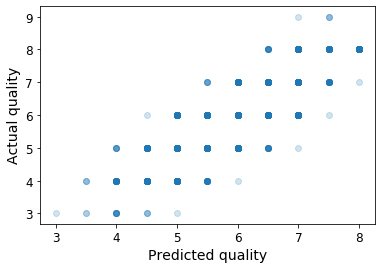

In [58]:
plt.scatter(x = training_labels_predict3, y = training_labels, alpha = 0.2)
plt.xlabel('Predicted quality')
plt.ylabel('Actual quality')
plt.show()

=> From the plot, we can observe that this model has high variance.

Build a k nearest neighbour regression model with k = 5 and calculate the rmse on training data:

In [17]:
from sklearn.neighbors import KNeighborsRegressor
neigh2 = KNeighborsRegressor(n_neighbors = 5)
neigh2.fit(training_features,training_labels)
training_labels_predict4 = neigh2.predict(training_features)
np.sqrt(mean_squared_error(training_labels, training_labels_predict4))

0.6530975660911724

=> The rmse of k nearest neighbour regression model with k = 5 is 0.653 

Draw a scatter plot represents the combination of actual quality, predicted quality of the k nearest neighbour regression model with k = 5:

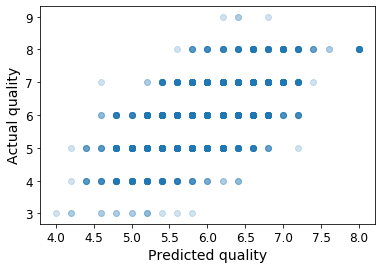

In [59]:
plt.scatter(x = training_labels_predict4, y = training_labels, alpha = 0.2)
plt.xlabel('Predicted quality')
plt.ylabel('Actual quality')
plt.show()

=> From the plot, we can observe that this model has high variance.

Build a k nearest neighbour regression model with k = 100 and calculate the rmse on training data:

In [19]:
from sklearn.neighbors import KNeighborsRegressor
neigh3 = KNeighborsRegressor(n_neighbors = 100)
neigh3.fit(training_features,training_labels)
training_labels_predict5 = neigh3.predict(training_features)
np.sqrt(mean_squared_error(training_labels, training_labels_predict5))

0.8173830643692311

=> The rmse of k nearest neighbour regression model with k = 100 is 0.817

Draw a scatter plot represents the combination of actual quality, predicted quality of the k nearest neighbour regression model with k = 100:

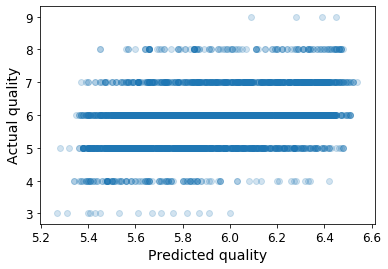

In [60]:
plt.scatter(x = training_labels_predict5, y = training_labels, alpha = 0.2)
plt.xlabel('Predicted quality')
plt.ylabel('Actual quality')
plt.show()

=> From the plot, we can observe that this model has low variance.

Build a decision tree model and calculate the rmse on training data:

In [21]:
from sklearn import tree
dec = tree.DecisionTreeRegressor()
dec.fit(training_features,training_labels)
training_labels_predict6 = dec.predict(training_features)
np.sqrt(mean_squared_error(training_labels, training_labels_predict6))

0.0

=> The rmse of decision tree model is 0.000

Draw a scatter plot represents the combination of actual quality, predicted quality of the decision tree model:

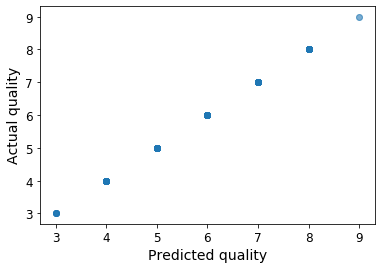

In [61]:
plt.scatter(x = training_labels_predict6, y = training_labels, alpha = 0.2)
plt.xlabel('Predicted quality')
plt.ylabel('Actual quality')
plt.show()

=> From the plot, we can observe that this model has high variance.

Conclusion:

1. The rmse of decision tree model is the lowest (0.000); of k nearest neighbour regression model with k = 2 and k = 5 is higher (0.448 and 0.653); follow by that of linear regression model (0.749) and the rmse of k nearest neighbour regression model with k = 100 is the highest (0.817)

2. The rmse of k nearest neighbour regression model with k = 2 is is the lowest (0.448), with k = 5 is higher (0.653) and with k = 100 is the highest (0.817).

Explanation:

The linear regression model use the linear formula to show the relationship between independent variables (in this case, all of the attributes expect 'quality') and dependent variable (in this case, 'quality'). This model is restricted to linear relationship.

The k nearest neighbour regression model use k nearest points to calculate the predicted value. In this case, if 'k' is small (k = 2 and k = 5), the predicted value depends on small nearest points => this model has high variance and low bias => The rmse of this model is lower than that of decision tree model. If 'k' is large (k = 100), the predicted value depends on large nearest points => this model has low variance and high bias => The rmse of this model with large 'k' is higher than that of decision tree model.

The Decision tree regression model arriving at an estimate by asking a series of True/False questions to the data, each question narrowing the possible values until the stopping condition is met (in this case, the stopping condition is there is no possible further split) => the rmse of this model is 0.000 on the training data; this model has low variance and high bias.

# Task 5: Cross validation 

Perform 10 fold cross validation for decision tree model

In [23]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(dec, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores1)

array([0.82025802, 0.78910791, 0.85336521, 0.78407635, 0.84247405,
       0.88523509, 0.87171925, 0.8956064 , 0.82455696, 0.85758366])

In [24]:
np.sqrt(-scores1).mean()

0.8423982911000969

In [25]:
np.sqrt(-scores1).std()

0.035953449455046554

=> After 10 fold cross validation, the decision tree model has 10 rmse values with the Mean is 0.847 and the Standard deviation is 0.034

Perform 10 fold cross validation for the k nearest neighbour regression model with k = 2

In [26]:
scores2 = cross_val_score(neigh1, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores2)

array([0.83262943, 0.82346844, 0.81945345, 0.84364769, 0.77858881,
       0.87096223, 0.7932765 , 0.89006537, 0.93222724, 0.82735954])

In [27]:
np.sqrt(-scores2).mean()

0.8411678676542994

In [28]:
np.sqrt(-scores2).std()

0.04339897516756443

=> After 10 fold cross validation, the k nearest neighbour regression model with k = 2 has 10 rmse values with the Mean is 0.841 and the Standard deviation is 0.043

Perform 10 fold cross validation for the k nearest neighbour regression model with k = 5:

In [29]:
scores3 = cross_val_score(neigh2, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores3)

array([0.79264428, 0.78783629, 0.82410902, 0.80761547, 0.77684159,
       0.82647486, 0.80944295, 0.85657476, 0.86916611, 0.84069762])

In [30]:
np.sqrt(-scores3).mean()

0.8191402939937868

In [31]:
np.sqrt(-scores3).std()

0.02853969927064808

=> After 10 fold cross validation, the k nearest neighbour regression model with k = 5 has 10 rmse values with the Mean is 0.819 and the Standard deviation is 0.029

Perform 10 fold cross validation for the k nearest neighbour regression model with k = 100:

In [32]:
scores4 = cross_val_score(neigh3, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores4)

array([0.81755572, 0.77085003, 0.8307086 , 0.84137593, 0.78169628,
       0.84816393, 0.78390252, 0.85215264, 0.87126603, 0.85644831])

In [33]:
np.sqrt(-scores4).mean()

0.8254119996021408

In [34]:
np.sqrt(-scores4).std()

0.03354741204664086

=> After 10 fold cross validation, the k nearest neighbour regression model with k = 100 has 10 rmse values with the Mean is 0.825 and the Standard deviation is 0.034.

Perform 10 fold cross validation for the linear regression model:

In [35]:
scores5 = cross_val_score(reg, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores5)

array([0.73506089, 0.71465699, 0.76586764, 0.80219738, 0.71017192,
       0.7185415 , 0.76276561, 0.76723547, 0.79008287, 0.76111821])

In [36]:
np.sqrt(-scores5).mean()

0.7527698473082556

In [37]:
np.sqrt(-scores5).std()

0.030229322071314315

=> After 10 fold cross validation, the linear regression model has 10 rmse values with the Mean is 0.753 and the Standard deviation is 0.030

Conclusion:

1a. After perform 10 fold cross validation, the linear regression model has the lowest Rmse Mean value (0.753), the k nearest neighbour regression models have higher Rmse Mean value (0.841; 0.819; 0.825) and the decision tree model has the highest Rmse Mean value (0.849)

1b. After perform 10 fold cross validation, the k nearest neighbour regression model with k = 5 has the lowest Rmse Mean value (0.819), that model with k = 100 has higher Rmse Mean value (0.825) and that model with k = 2 has the highest Rmse Mean value (0.841)

2a. From the result, the linear model has the lowest Rmse Mean value after 10 fold cross validation while the decision tree model has the highest Rmse Mean value. The reason for that is the decision tree model and k nearest neighbour regression models with small 'k' (k = 2 and k = 5) have high variance and low bias (as explanation is task 4) => These models have higher Rmse mean value than the linear model when performing 10 fold cross validation. About k nearest neighbour regression model with large 'k' (k = 100), this model still have low variance and high bias (as explanation is task 4) => this model has higher Rmse mean value than the linear model when performing 10 fold cross validation.

2b. On this basis, the most suitable model is linear regression model because that model has the lowest rmse after 10 fold cross validation.

# Task 6: Free choice

Step 1: Choosing new model - Random Forest Regression model

Step 2: Optimization the Random Forest Regression model

Step 3: Running both models on the test data.

The reason I choose Random Forest Regression model is I want to keep the strength of the Decision Tree Regression model (high variance) and improve the weakness of that model (low bias).
Random Forest Regression model is the model that have several Decision Trees. Each tree use a part of the training data. The predicted value is the average of the values provided by these Decision Tree. As the result, that model prevents the "overfitting" problem of the Decision Tree Regression model.

Perform 10 fold cross validation for Random Forest Regression model:

In [38]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(n_estimators = 100)
for_reg.fit(training_features,training_labels)
scores6 = cross_val_score(for_reg, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores6)

array([0.59869317, 0.57384184, 0.63002199, 0.58686187, 0.57519206,
       0.62315649, 0.63786997, 0.65413804, 0.65527873, 0.62589639])

In [39]:
np.sqrt(-scores6).mean()

0.6160950554538329

In [40]:
np.sqrt(-scores6).std()

0.029004238311748365

=> After 10 fold cross validation, the Random Forest Regression model has 10 rmse values with the Mean is 0.615 and the Standard deviation is 0.031

=> Compare to the most suitable model in task 5 - linear regression model, the Random Forest Regression model has lower Rmse Mean value (0.615) than the linear regression model (0.753)

Optimization the Random Forest Regression model by using RandomizedSearchCV to get the most suitable parameters:

In [44]:
from sklearn.model_selection import RandomizedSearchCV

for_reg_base = DecisionTreeClassifier(random_state = 0, n_jobs = -1) 

param_grid = { 
    'n_estimators': np.linspace(50, 500, 10, dtype = 'int64'),
    'max_features' : ["auto", "sqrt", "log2"],
    'max_depth' : np.linspace(2, 40, 20)
}

CV_for_reg_base = RandomizedSearchCV(estimator = for_reg_base, param_distributions = param_grid, n_jobs = -1, cv = 10, n_iter = 100)
CV_for_reg_base.fit(training_features,training_labels)
CV_for_reg_base.best_params_

{'n_estimators': 500, 'max_features': 'log2', 'max_depth': 34.0}

=> from RandomizedSearchCV, I get the most suitable parameters is: 'n_estimators' = 500, 'max_features' = 'log2', 'max_depth' = 34.0 (The parameters can be change after each run because I only choose 100 combinations (n_iner) out of 10 x 3 x 20 = 600 combinations)

Build a new Random Forest Regression model with these parameters:

In [45]:
for_reg2 = RandomForestRegressor(n_estimators = 500, max_features = "log2", max_depth = 34.0)
for_reg2.fit(training_features,training_labels)
scores7 = cross_val_score(for_reg2, training_features, training_labels, scoring = 'neg_mean_squared_error', cv = 10)
np.sqrt(-scores7)

array([0.59204586, 0.56214892, 0.61104355, 0.58519407, 0.56635296,
       0.5943817 , 0.61419776, 0.64828351, 0.64779136, 0.61956023])

In [46]:
np.sqrt(-scores7).mean()

0.604099993501134

In [47]:
np.sqrt(-scores7).std()

0.02834118638224339

=> After 10 fold cross validation, the new Random Forest Regression model has 10 rmse values with the Mean is 0.604 and the Standard deviation is 0.028

=> Compare to the previous Random Forest Regression model, the new Random Forest Regression model has lower Rmse Mean value (0.604) than the previous one (0.615)

Running both models on the test data:

In [48]:
test_features = test_set.drop(['quality'], axis=1)
test_labels = test_set['quality'].copy()

The Linear Regression model: 

In [49]:
test_labels_predict1 = reg.predict(test_features)
np.sqrt(mean_squared_error(test_labels, test_labels_predict1))

0.7603416538268244

=> The rmse of Linear Regression model on test data is 0.760

The K nearest neighbour regression model with k = 5: 

In [51]:
test_labels_predict2 = neigh2.predict(test_features)
np.sqrt(mean_squared_error(test_labels, test_labels_predict2))

0.8265632166113203

=> The rmse of K nearest neighbour regression model with k = 5 on test data is 0.827

The Decision Tree model:

In [52]:
test_labels_predict3 = dec.predict(test_features)
np.sqrt(mean_squared_error(test_labels, test_labels_predict3))

0.8635858907585855

=> The rmse of Decision Tree model on test data is 0.864

The Random Forest Regression model without Optimization:

In [53]:
test_labels_predict4 = for_reg.predict(test_features)
np.sqrt(mean_squared_error(test_labels, test_labels_predict4))

0.6273707777917332

=> The rmse of Random Forest Regression model without Optimization on test data is 0.627

The Random Forest Regression model with Optimization:

In [54]:
test_labels_predict5 = for_reg2.predict(test_features)
np.sqrt(mean_squared_error(test_labels, test_labels_predict5))

0.6209351473236567

=> The rmse of Random Forest Regression model with Optimization on test data is 0.621

Conclusion: the Random Forest Regression model with Optimization is the most suitable model for this data set.